<h1>Esercizio n°1</h1>

Un macchinario riempie automaticamente delle confezioni alimentari il cui peso segue una distribuzione
normale di media 220 g e deviazione standard 8 g.
1. Qual `e la probabilit`a che la confezione pesi pi`u di 230 g?
2. Qual `e la probabilit`a che il peso della confezione sia compreso tra 210 g e 225 g?
3. Le confezioni vengono imballate in scatole da 10 unit`a. Dopo aver calcolato la distribuzione del
peso della scatola, calcolare la probabilit`a che il peso totale superi i 2250 g (si trascuri il peso
della scatola).

In [31]:
# 1

from scipy.stats import norm

media = 220
dev = 8

x = 230

p1 = norm.sf(x, media, dev)
print(f'P(X > 230) = {p1:.4f}')

P(X > 230) = 0.1056


In [32]:
# 2

x1 = 210
x2 = 225

p2 = 1 - norm.cdf(x1, media, dev) - norm.sf(x2, media, dev)
print(f'P(210 < X < 225) = {p2:.4f}')

P(210 < X < 225) = 0.6284


In [33]:
# 3

n = 10
media *= n
dev *= n

x = 2250

p3 = norm.sf(x, media, dev)
print(f'P(X > 2250) = {p3:.4f}')

P(X > 2250) = 0.2660


<h1>Esercizio n°2</h1>

Si considerino i seguenti dati, ottenuti sperimentalmente per determinare l’effetto del tempo in ore
(x) a una particolare temperatura e il cambiamento della viscosit`a (y) di un olio.
x 0.25 0.5 0.75 1 1.25 1.5 1.75 2 2.25 2.5
y -1.42 -1.39 -1.55 -1.89 -2.43 -3.15 -4.05 -5.15 -6.43 -7.89
1. Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%. Si
calcoli il coefficiente di determinazione.
2. Si rappresentino i dati e la retta di regressione in uno stesso grafico.
3. Si determinino i coefficienti per un modello di regressione lineare del tipo y = a0 + a1x + a2x
2
e
si calcoli nuovamente il coefficiente di determinazione. Si pu`o affermare che il secondo modello
si adatta meglio ai dati? Giustificare la risposta.
4. Si rappresentino i dati, la retta di regressione e il modello quadratico in uno stesso grafico.


In [34]:
# 1

import numpy as np
from scipy.stats import t

x = np.array([0.25*i for i in range(1, 11)])
y = np.array([-1.42, -1.39, -1.55, -1.89, -2.43, -3.15, -4.05, -5.15, -6.43, -7.89])

n = len(x)
x_bar = np.mean(x)
y_bar = np.mean(y)
sig_xy = np.sum((x - x_bar) * (y - y_bar)) / n
sig_x2 = np.sum((x - x_bar)**2) / n
sig_y2 = np.sum((y - y_bar)**2) / n

b0 = y_bar - sig_xy / sig_x2 * x_bar
b1 = sig_xy / sig_x2

print(f'b0 = {b0:.4f}')
print(f'b1 = {b1:.4f}')

b0 = 0.4220
b1 = -2.8778


In [35]:
y_hat = b0 + b1*x
r = y - y_hat

s2 = np.sum(r**2) / (n-2)

alpha = 0.05
T = t.ppf(1-alpha/2, n-2)
b0_int = (b0 - np.sqrt(s2)*np.sqrt(1./n + x_bar**2./(n*sig_x2))*T, b0 + np.sqrt(s2)*np.sqrt(1./n + x_bar**2./(n*sig_x2))*T)
b1_int = (b1 - np.sqrt(s2)/np.sqrt(n*sig_x2)*T, b1 + np.sqrt(s2)/np.sqrt(n*sig_x2)*T)

print(f'Intervallo di confidenza per b0: ({b0_int[0]:.4f}, {b0_int[1]:.4f})')
print(f'Intervallo di confidenza per b1: ({b1_int[0]:.4f}, {b1_int[1]:.4f})')

Intervallo di confidenza per b0: (-0.7734, 1.6174)
Intervallo di confidenza per b1: (-3.6485, -2.1072)


In [36]:
R2 = sig_xy**2 / (sig_x2*sig_y2)
print(f'R^2 = {R2:.4f}')

R^2 = 0.9026


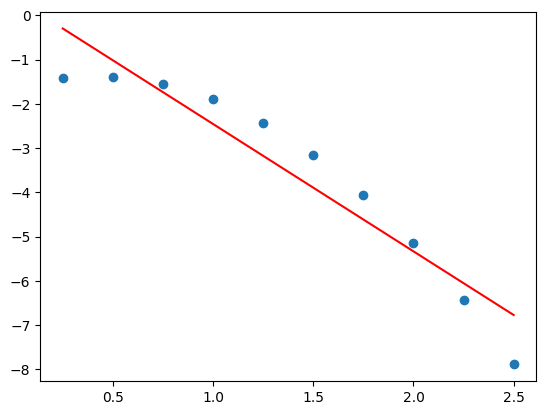

In [37]:
# 2

import matplotlib.pyplot as plt

xx = np.linspace(min(x), max(x), 1000)
yy = b0 + b1*xx

plt.plot(xx, yy, 'r')
plt.scatter(x, y)
plt.show()

In [38]:
# 3

X = np.zeros((n, 3))
X[:, 0] = np.ones(n) #slide 36
X[:, 1] = x
X[:, 2] = x**2

XX = np.linalg.pinv(X) #pseudo inversa
b = np.dot(XX, y)
y_hat2 = np.dot(X, b) #slide 40

for i in range(3):
    print(f'b{i} = {b[i]:.4f}')

b0 = -1.6330
b1 = 1.2322
b2 = -1.4945


In [39]:
R22 = np.sum((y_hat2 - y_bar)**2) / np.sum((y - y_bar)**2)
print(f'R^2 = {R22:.4f}')

R^2 = 1.0000


Il nuovo coefficiente di determinazione è superiore al precedente, quindi la regressione lineare multipla è migliore di quella semplice.

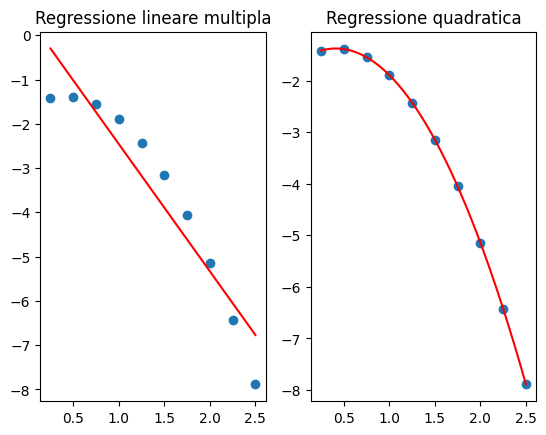

In [40]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(x, y, 'o')
ax[0].plot(xx, yy, 'r')
ax[0].set_title('Regressione lineare multipla')

yy2 = b[0] + b[1]*xx + b[2]*xx**2

ax[1].plot(x, y, 'o')
ax[1].plot(xx, yy2, 'r')
ax[1].set_title('Regressione quadratica')
plt.show()

<h1>Esercizio n°3</h1>

Si effettua uno studio su quale sia la temperatura corporea limite per cui essa si possa considerare
normale. Si estrae un campione di 25 soggetti riportando le seguenti misurazioni in °C.
36.6, 36.2, 36.3, 36.4, 36.6, 36.6, 36.7, 36.7, 36.7, 36.7,
36.8, 36.8, 36.8, 36.9, 36.9, 36.9, 36.9, 37.0, 37.0, 37.1,
37.1, 37.1, 37.2, 37.2, 37.2.
1. Si calcolino la media e la deviazione standard campionarie, e l’intervallo di confidenza per la
media con livello di fiducia 0.01.
2. Si testi l’ipotesi che la temperatura limite normale media sia di 37 °C. Si utilizzi α = 0.05.
3. Calcolare il p-value del test.
4. Quale sarebbe la dimensione campionaria richiesta per determinare una temperatura limite reale
di 36.8 °C richiedendo una potenza del test del 90%?


In [41]:
# 1

data = np.array([36.6, 36.2, 36.3, 36.4, 36.6, 36.6, 36.7, 36.7, 36.7, 36.7,
                 36.8, 36.8, 36.8, 36.9, 36.9, 36.9, 36.9, 37.0, 37.0, 37.1,
                 37.1, 37.1, 37.2, 37.2, 37.2])

n = len(data)
media = np.mean(data)
dev = np.std(data, ddof=1)

print(f'Media = {media:.4f}')
print(f'Deviazione standard = {dev:.4f}')

Media = 36.8160
Deviazione standard = 0.2734


In [42]:
def conf_int(avg, std, n, alpha):
    df = n - 1
    phi = t.ppf(1 - alpha/2, df)
    lower = avg - phi * std / np.sqrt(n)
    upper = avg + phi * std / np.sqrt(n)
    return lower, upper

alpha = 0.01

lower, upper = conf_int(media, dev, n, alpha)

print(f'Intervallo di confidenza al 99%: ({lower:.4f}, {upper:.4f})')

Intervallo di confidenza al 99%: (36.6631, 36.9689)


In [43]:
# 2

mu_0 = 37
alpha = 0.05

T0 = (media - mu_0) / dev * np.sqrt(n)

if abs(T0) > t.ppf(1-alpha/2, n-1):
    print(f'H0 rigettata')
else:
    print(f'H0 accettata')

H0 rigettata


In [44]:
# 3

p_value = 2 * (1 - t.cdf(abs(T0), n-1))
print(f'p-value = {p_value:.4f}')

p-value = 1.9974


In [45]:
# 4

mu = 36.8
delta = media - mu
potenza = 0.9

n = (t.ppf(1-alpha/2, n-1) + t.ppf(potenza, n-1))**2 * dev**2 / delta**2

print(f'n = {n:.4f}')

n = 3338.5155
